In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!mkdir -p /content/drive/MyDrive/NNS
%cd /content/drive/MyDrive/NNS

/content/drive/MyDrive/NNS


In [ ]:
#Installing SRA Toolkit
!apt-get install -y sra-toolkit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  blends-common libkdf5-2 libncbi-vdb2 libncbi-wvdb2 med-config menu
Suggested packages:
  blends-doc menu-l10n gksu | kde-runtime | ktsuss
The following NEW packages will be installed:
  blends-common libkdf5-2 libncbi-vdb2 libncbi-wvdb2 med-config menu sra-toolkit
0 upgraded, 7 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,290 kB of archives.
After this operation, 23.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 menu amd64 2.1.47ubuntu4 [354 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 blends-common all 0.7.4ubuntu1 [15.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libkdf5-2 amd64 2.11.2+dfsg-4build2 [14.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libncbi-vdb2 amd64 2.11.2+dfsg-4build2 [1,364 kB]
Get:5

In [ ]:
# Downloading sequencing data
!fastq-dump --split-files SRR28334538

Read 922760 spots for SRR28334538
Written 922760 spots for SRR28334538


In [ ]:
# Installing FastQC
!apt-get install -y fastqc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libapache-pom-java
  libargs4j-java libatk-wrapper-java libatk-wrapper-java-jni libcommons-compress-java
  libcommons-io-java libcommons-jexl2-java libcommons-lang3-java libcommons-logging-java
  libcommons-math3-java libcommons-parent-java libfindbin-libs-perl libfontenc1 libhtsjdk-java
  libjbzip2-java libjson-simple-java libngs-java libngs-sdk-dev libngs-sdk2 libsis-base-java
  libsis-base-jni libsis-jhdf5-java libsis-jhdf5-jni libsnappy-java libsnappy-jni libxkbfile1
  libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  libxz-java libcommons-io-java-doc libcommons-lang3-java-doc libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-logkit-java liblog4j1.2-java picard-tools
  libjson-simple-doc mesa-utils
The following NEW packages wi

In [ ]:
# Performing quality control on raw reads
!fastqc SRR28334538_1.fastq SRR28334538_2.fastq

Started analysis of SRR28334538_1.fastq
Approx 5% complete for SRR28334538_1.fastq
Approx 10% complete for SRR28334538_1.fastq
Approx 15% complete for SRR28334538_1.fastq
Approx 20% complete for SRR28334538_1.fastq
Approx 25% complete for SRR28334538_1.fastq
Approx 30% complete for SRR28334538_1.fastq
Approx 35% complete for SRR28334538_1.fastq
Approx 40% complete for SRR28334538_1.fastq
Approx 45% complete for SRR28334538_1.fastq
Approx 50% complete for SRR28334538_1.fastq
Approx 55% complete for SRR28334538_1.fastq
Approx 60% complete for SRR28334538_1.fastq
Approx 65% complete for SRR28334538_1.fastq
Approx 70% complete for SRR28334538_1.fastq
Approx 75% complete for SRR28334538_1.fastq
Approx 80% complete for SRR28334538_1.fastq
Approx 85% complete for SRR28334538_1.fastq
Approx 90% complete for SRR28334538_1.fastq
Approx 95% complete for SRR28334538_1.fastq
Analysis complete for SRR28334538_1.fastq
Started analysis of SRR28334538_2.fastq
Approx 5% complete for SRR28334538_2.fastq


In [ ]:
#Installing Trimmomatic
!wget http://www.usadellab.org/cms/uploads/supplementary/Trimmomatic/Trimmomatic-0.39.zip

--2024-11-18 11:58:00--  http://www.usadellab.org/cms/uploads/supplementary/Trimmomatic/Trimmomatic-0.39.zip
Resolving www.usadellab.org (www.usadellab.org)... 80.83.125.111
Connecting to www.usadellab.org (www.usadellab.org)|80.83.125.111|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133596 (130K) [application/zip]
Saving to: ‘Trimmomatic-0.39.zip’

Trimmomatic-0.39.zi 100%[===================>] 130.46K   287KB/s    in 0.5s    

2024-11-18 11:58:01 (287 KB/s) - ‘Trimmomatic-0.39.zip’ saved [133596/133596]



In [ ]:
!unzip Trimmomatic-0.39.zip

Archive:  Trimmomatic-0.39.zip
   creating: Trimmomatic-0.39/
  inflating: Trimmomatic-0.39/LICENSE  
  inflating: Trimmomatic-0.39/trimmomatic-0.39.jar  
   creating: Trimmomatic-0.39/adapters/
  inflating: Trimmomatic-0.39/adapters/NexteraPE-PE.fa  
  inflating: Trimmomatic-0.39/adapters/TruSeq2-PE.fa  
  inflating: Trimmomatic-0.39/adapters/TruSeq2-SE.fa  
  inflating: Trimmomatic-0.39/adapters/TruSeq3-PE-2.fa  
  inflating: Trimmomatic-0.39/adapters/TruSeq3-PE.fa  
  inflating: Trimmomatic-0.39/adapters/TruSeq3-SE.fa  


In [ ]:
#Performing trimming
!java -jar Trimmomatic-0.39/trimmomatic-0.39.jar PE \
    SRR28334538_1.fastq SRR28334538_2.fastq \
     SRR28334538_1_paired.fastq  SRR28334538_1_unpaired.fastq \
     SRR28334538_2_paired.fastq  SRR28334538_2_unpaired.fastq \
    ILLUMINACLIP:Trimmomatic-0.39/adapters/NexteraPE-PE.fa:2:30:10 \
    LEADING:3 TRAILING:3 SLIDINGWINDOW:4:15 MINLEN:36


TrimmomaticPE: Started with arguments:
 SRR28334538_1.fastq SRR28334538_2.fastq SRR28334538_1_paired.fastq SRR28334538_1_unpaired.fastq SRR28334538_2_paired.fastq SRR28334538_2_unpaired.fastq ILLUMINACLIP:Trimmomatic-0.39/adapters/NexteraPE-PE.fa:2:30:10 LEADING:3 TRAILING:3 SLIDINGWINDOW:4:15 MINLEN:36
Multiple cores found: Using 2 threads
Using PrefixPair: 'AGATGTGTATAAGAGACAG' and 'AGATGTGTATAAGAGACAG'
Using Long Clipping Sequence: 'GTCTCGTGGGCTCGGAGATGTGTATAAGAGACAG'
Using Long Clipping Sequence: 'TCGTCGGCAGCGTCAGATGTGTATAAGAGACAG'
Using Long Clipping Sequence: 'CTGTCTCTTATACACATCTCCGAGCCCACGAGAC'
Using Long Clipping Sequence: 'CTGTCTCTTATACACATCTGACGCTGCCGACGA'
ILLUMINACLIP: Using 1 prefix pairs, 4 forward/reverse sequences, 0 forward only sequences, 0 reverse only sequences
Quality encoding detected as phred33
Input Read Pairs: 922760 Both Surviving: 647059 (70.12%) Forward Only Surviving: 273805 (29.67%) Reverse Only Surviving: 1229 (0.13%) Dropped: 667 (0.07%)
TrimmomaticPE: Co

In [ ]:
# Run FastQC on trimmed files
!fastqc SRR28334538_1_paired.fastq  SRR28334538_2_paired.fastq

Started analysis of SRR28334538_1_paired.fastq
Approx 5% complete for SRR28334538_1_paired.fastq
Approx 10% complete for SRR28334538_1_paired.fastq
Approx 15% complete for SRR28334538_1_paired.fastq
Approx 20% complete for SRR28334538_1_paired.fastq
Approx 25% complete for SRR28334538_1_paired.fastq
Approx 30% complete for SRR28334538_1_paired.fastq
Approx 35% complete for SRR28334538_1_paired.fastq
Approx 40% complete for SRR28334538_1_paired.fastq
Approx 45% complete for SRR28334538_1_paired.fastq
Approx 50% complete for SRR28334538_1_paired.fastq
Approx 55% complete for SRR28334538_1_paired.fastq
Approx 60% complete for SRR28334538_1_paired.fastq
Approx 65% complete for SRR28334538_1_paired.fastq
Approx 70% complete for SRR28334538_1_paired.fastq
Approx 75% complete for SRR28334538_1_paired.fastq
Approx 80% complete for SRR28334538_1_paired.fastq
Approx 85% complete for SRR28334538_1_paired.fastq
Approx 90% complete for SRR28334538_1_paired.fastq
Approx 95% complete for SRR28334538_

In [ ]:
# Installing BWA
!apt-get install -y bwa

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  samtools
The following NEW packages will be installed:
  bwa
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 195 kB of archives.
After this operation, 466 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 bwa amd64 0.7.17-6 [195 kB]
Fetched 195 kB in 1s (221 kB/s)
Selecting previously unselected package bwa.
(Reading database ... 124578 files and directories currently installed.)
Preparing to unpack .../bwa_0.7.17-6_amd64.deb ...
Unpacking bwa (0.7.17-6) ...
Setting up bwa (0.7.17-6) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
# Downloading reference genome
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.fna.gz -O ecoli_ref.fasta.gz

--2024-11-18 13:55:15--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.13, 130.14.250.31, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1379902 (1.3M) [application/x-gzip]
Saving to: ‘ecoli_ref.fasta.gz’

ecoli_ref.fasta.gz  100%[===================>]   1.32M  2.97MB/s    in 0.4s    

2024-11-18 13:55:16 (2.97 MB/s) - ‘ecoli_ref.fasta.gz’ saved [1379902/1379902]



In [ ]:
!gunzip ecoli_ref.fasta.gz

In [ ]:
# Index the reference genome
!bwa index ecoli_ref.fasta


[bwa_index] Pack FASTA... 0.04 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 1.67 seconds elapse.
[bwa_index] Update BWT... 0.03 sec
[bwa_index] Pack forward-only FASTA... 0.02 sec
[bwa_index] Construct SA from BWT and Occ... 0.68 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index ecoli_ref.fasta
[main] Real time: 2.581 sec; CPU: 2.450 sec


In [ ]:
# Aligning trimmed reads
!bwa mem ecoli_ref.fasta SRR28334538_1_paired.fastq SRR28334538_2_paired.fastq > aligned_reads.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 42520 sequences (10000414 bp)...
[M::process] read 42964 sequences (10000114 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (24, 15595, 0, 12)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (234, 484, 741)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 1755)
[M::mem_pestat] mean and std.dev: (436.71, 276.10)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 2262)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (297, 374, 496)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 894)
[M::mem_pestat] mean and std.dev: (407.99, 145.61)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 1093)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] analyzing insert size dist

In [ ]:
#Installing Samtools
!apt-get install -y samtools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
samtools is already the newest version (1.13-4).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# Converting SAM to BAM and sorting and indexing
!samtools view -bS aligned_reads.sam > aligned_reads.bam

In [ ]:
!samtools sort aligned_reads.bam -o sorted_reads.bam

In [ ]:
!samtools index sorted_reads.bam


In [ ]:
# Installing BCFtools
!apt-get install -y bcftools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  python3-numpy python3-matplotlib texlive-latex-recommended
The following NEW packages will be installed:
  bcftools
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 697 kB of archives.
After this operation, 2,360 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 bcftools amd64 1.13-1 [697 kB]
Fetched 697 kB in 1s (1,020 kB/s)
Selecting previously unselected package bcftools.
(Reading database ... 124694 files and directories currently installed.)
Preparing to unpack .../bcftools_1.13-1_amd64.deb ...
Unpacking bcftools (1.13-1) ...
Setting up bcftools (1.13-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
# Calling variants
!bcftools mpileup -f ecoli_ref.fasta sorted_reads.bam | bcftools call -mv -Ov -o variants.vcf

Note: none of --samples-file, --ploidy or --ploidy-file given, assuming all sites are diploid
[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 250


In [ ]:
# Installing BEDTools
!apt-get install -y bedtools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  bedtools
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 563 kB of archives.
After this operation, 1,548 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 bedtools amd64 2.30.0+dfsg-2ubuntu0.1 [563 kB]
Fetched 563 kB in 1s (458 kB/s)
Selecting previously unselected package bedtools.
(Reading database ... 124749 files and directories currently installed.)
Preparing to unpack .../bedtools_2.30.0+dfsg-2ubuntu0.1_amd64.deb ...
Unpacking bedtools (2.30.0+dfsg-2ubuntu0.1) ...
Setting up bedtools (2.30.0+dfsg-2ubuntu0.1) ...


In [ ]:
# Downloading annotation file (GFF format)
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz -O ecoli_annotation.gff.gz

--2024-11-18 14:14:18--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.12, 130.14.250.13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 433547 (423K) [application/x-gzip]
Saving to: ‘ecoli_annotation.gff.gz’

ecoli_annotation.gf 100%[===================>] 423.39K  1.33MB/s    in 0.3s    

2024-11-18 14:14:19 (1.33 MB/s) - ‘ecoli_annotation.gff.gz’ saved [433547/433547]



In [ ]:
!gunzip ecoli_annotation.gff.gz

In [ ]:
#Quality filters
!bcftools filter -i 'QUAL>30 && DP>10' variants.vcf -o filtered_variants.vcf


In [ ]:
# Annotating variants
!bedtools intersect -a filtered_variants.vcf -b ecoli_annotation.gff > annotated_variants.txt

In [ ]:
%cd

/root


In [ ]:
%cd /content/drive/MyDrive/NNS

/content/drive/MyDrive/NNS


In [ ]:
!ls -l filtered_variants.vcf

-rw------- 1 root root 14513812 Nov 18 15:17 filtered_variants.vcf


In [ ]:
!head filtered_variants.vcf

##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##bcftoolsVersion=1.13+htslib-1.13+ds
##bcftoolsCommand=mpileup -f ecoli_ref.fasta sorted_reads.bam
##reference=file://ecoli_ref.fasta
##contig=<ID=NC_000913.3,length=4641652>
##ALT=<ID=*,Description="Represents allele(s) other than observed.">
##INFO=<ID=INDEL,Number=0,Type=Flag,Description="Indicates that the variant is an INDEL.">
##INFO=<ID=IDV,Number=1,Type=Integer,Description="Maximum number of raw reads supporting an indel">
##INFO=<ID=IMF,Number=1,Type=Float,Description="Maximum fraction of raw reads supporting an indel">


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/NNS

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/NNS


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%cd /content/drive/MyDrive/NNS

/content/drive/MyDrive/NNS


In [ ]:
%cd

/root


In [ ]:
# Load VCF file into a Dataframe
vcf_data = pd.read_csv("/content/drive/MyDrive/NNS/filtered_variants.vcfile", comment="#", sep="\t", header=None)
num_cols = vcf_data.shape[1]
vcf_data.columns = ["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO"] + [f"SAMPLE_{i}" for i in range(num_cols - 8)]

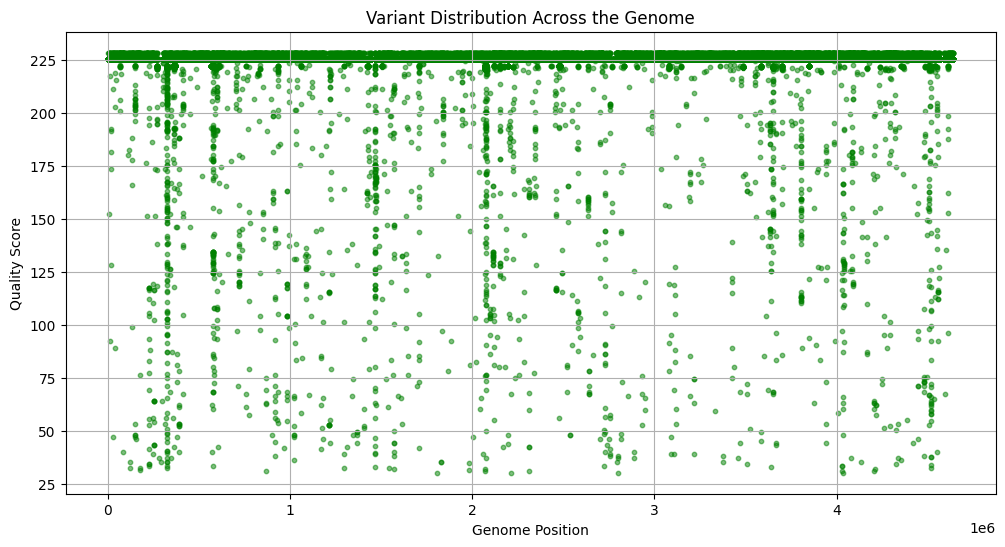

In [ ]:
# Plot variant positions
plt.figure(figsize=(12, 6))
plt.scatter(vcf_data['POS'], vcf_data['QUAL'], c='green', s=10, alpha=0.5)
plt.title('Variant Distribution Across the Genome')
plt.xlabel('Genome Position')
plt.ylabel('Quality Score')
plt.grid(True)
plt.show()

In [ ]:
# Extracting Depth (DP) from INFO field
vcf_data['DP'] = vcf_data['INFO'].str.extract(r'DP=(\d+)').astype(float)


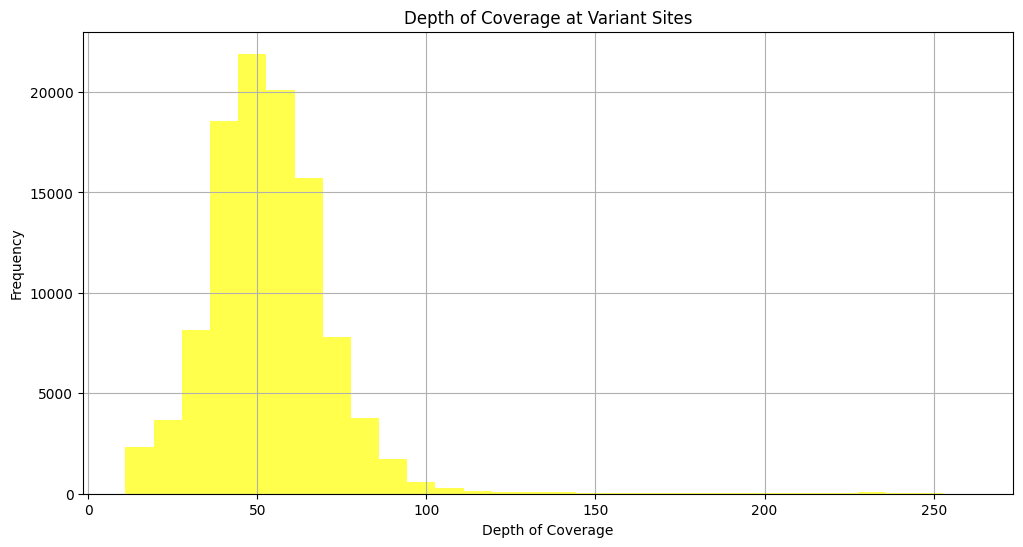

In [ ]:
# Plotting depth distribution
plt.figure(figsize=(12, 6))
plt.hist(vcf_data['DP'], bins=30, color='yellow', alpha=0.7)
plt.title('Depth of Coverage at Variant Sites')
plt.xlabel('Depth of Coverage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Filter SNPs and indels based on the ALT column
snps = vcf_data[vcf_data['ALT'] != '*']
indels = vcf_data[vcf_data['ALT'] == '*']


In [ ]:
# Display the counts of SNPs and indels
print(f"Number of SNPs: {len(snps)}")
print(f"Number of Indels: {len(indels)}")


Number of SNPs: 105529
Number of Indels: 0


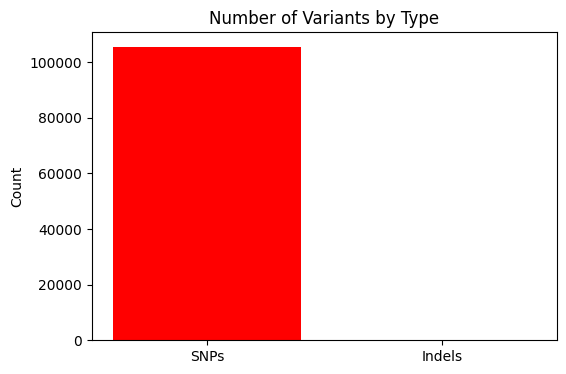

In [ ]:
# Create a bar chart for SNP and indel counts
variant_types = ['SNPs', 'Indels']
counts = [len(snps), len(indels)]
plt.figure(figsize=(6, 4))
plt.bar(variant_types, counts, color=['Red', 'green'])
plt.title('Number of Variants by Type')
plt.ylabel('Count')
plt.show()
